In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import os
 
for i in (np, mpl, sklearn):
    print(i.__name__,": ",i.__version__,sep="")

numpy: 1.19.5
matplotlib: 2.1.0
sklearn: 0.22


## 7.1 投票分类器

In [24]:
heads_proba = 0.51
np.random.seed(42)
# 10000 x 10 类似于 10个分类器 每个分类器训练10000次 
coin_tosses = (np.random.rand(10000,10) < heads_proba).astype(np.int32)
# 行累加 训练10000次后 可求出每个分类器的概率
cumulative_heads_ration = np.cumsum(coin_tosses, axis=0)/np.arange(1,10001).reshape(-1,1)
# print(np.random.rand(10000,10) < heads_proba)
# print(coin_tosses)
# print(np.cumsum(coin_tosses, axis=0))
# print(np.arange(1,10001).reshape(-1,1))
# print(cumulative_heads_ration)
coin_tosses.shape, cumulative_heads_ration.shape

((10000, 10), (10000, 10))

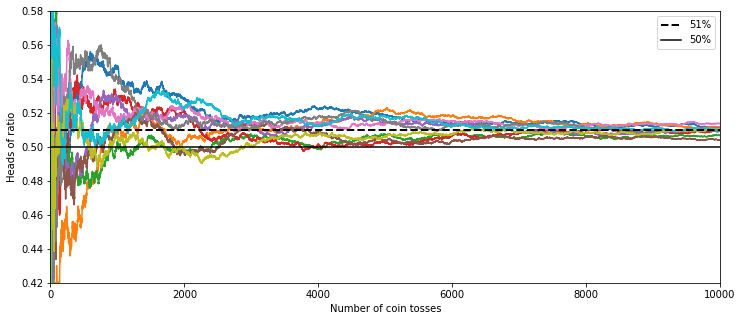

In [25]:
plt.figure(figsize=(12,5))
plt.plot(cumulative_heads_ration)
plt.plot([0,10000],[0.51,0.51],"k--",linewidth=2, label="51%")
plt.plot([0,10000],[0.5,0.5],"k-",label="50%")
plt.axis([0,10000,0.42,0.58])
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads of ratio")
plt.legend()
 
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
 
# 卫星数据集 500个样本
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
# 划分训练集、测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((375, 2), (125, 2), (375,), (125,))

In [27]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# 不同分类器：基于不同算法
log_clf = LogisticRegression(solver="lbfgs",random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale",random_state=42)

# 投票分类器：硬投票
voting_clf = VotingClassifier(estimators=[("lr",log_clf),("rf",rnd_clf),("svc",svm_clf)],
                             voting="hard")
# 训练
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [6]:
from sklearn.metrics import accuracy_score

# 预测
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


In [28]:
# 不同分类器：基于不同算法
log_clf = LogisticRegression(solver="lbfgs",random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100,random_state=42)
svm_clf = SVC(gamma="scale",probability=True, random_state=42) # probability=True 交叉验证时使用predict_proba()估算出概率

# 投票分类器：软投票
voting_clf = VotingClassifier(estimators=[("lr",log_clf),("rf",rnd_clf),("svc",svm_clf)],
                             voting="soft")

# 训练
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [29]:
# 预测
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


## 7.2 bagging 和 pasting

### 7.2.1 Scikit-Learn 中的 bagging 和 pasting

In [121]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 不同分类器：基于不同训练集子集（DecisionTreeClassifier bagging）（BaggingClassifier 500颗决策树）
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42),
                           n_estimators=500, max_samples=100,
                           bootstrap=True,random_state=42)
# 训练
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
  

In [123]:
# 预测
y_pred = bag_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.904


In [124]:
# 单个决策树分类器（DecisionTreeClassifier）
tree_clf = DecisionTreeClassifier(random_state=42)
# 训练
tree_clf.fit(X_train, y_train)

# 预测
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


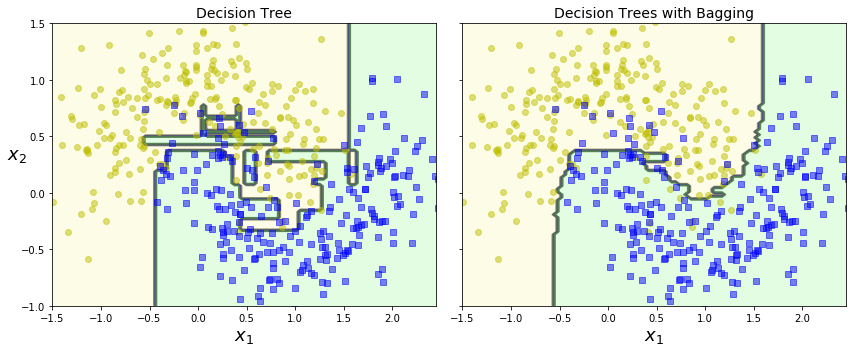

In [125]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5,2.45,-1,1.5],alpha=0.5,contour=True):
    # 特征 1
    x1s = np.linspace(axes[0],axes[1],100)
    # 特征 2
    x2s = np.linspace(axes[2],axes[3],100)
    # 测试集
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    # 预测分类值
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    # 填充预测轮廓
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    
    # 绘制预测轮廓
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    
    # 绘制训练点集
    plt.plot(X[:,0][y==0], X[:,1][y==0],"yo",alpha=alpha)
    plt.plot(X[:,0][y==1], X[:,1][y==1],"bs",alpha=alpha)
    
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$x_2$",fontsize=18, rotation=0)

fix, axes = plt.subplots(ncols=2, figsize=(12,5), sharey=True)

# 左图 
plt.sca(axes[0])
# 绘制训练点集、预测值（填充、绘制预测轮廓）
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree",fontsize=14)
 
# 右图
plt.sca(axes[1])
# 绘制训练点集、预测值（填充、绘制预测轮廓）
plot_decision_boundary(bag_clf, X, y)
plt.ylabel("")
plt.title("Decision Trees with Bagging",fontsize=14)
 
plt.tight_layout()
plt.show()

### 7.2.2 包外评估

In [39]:
# 训练结束后 自动包外评估（BaggingClassifier 500颗决策树）
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42),
                           n_estimators=500,bootstrap=True,
                           oob_score=True, random_state=40)
# 训练
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
  

In [41]:
# 包外评估准确率 对每个分类器评估后取均值 得到整体准确率
bag_clf.oob_score_

0.9013333333333333

In [43]:
# 测试集的准确率 通过预测函数验证 评估准确率和测试集准确率是否相接近
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.912


In [45]:
# 每个训练实例的类别概率
bag_clf.oob_decision_function_
# print(bag_clf.oob_decision_function_.shape)

array([[0.31746032, 0.68253968],
       [0.34117647, 0.65882353],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.08379888, 0.91620112],
       [0.31693989, 0.68306011],
       [0.02923977, 0.97076023],
       [0.97687861, 0.02312139],
       [0.97765363, 0.02234637],
       [0.74404762, 0.25595238],
       [0.        , 1.        ],
       [0.71195652, 0.28804348],
       [0.83957219, 0.16042781],
       [0.97777778, 0.02222222],
       [0.0625    , 0.9375    ],
       [0.        , 1.        ],
       [0.97297297, 0.02702703],
       [0.95238095, 0.04761905],
       [1.        , 0.        ],
       [0.01704545, 0.98295455],
       [0.38947368, 0.61052632],
       [0.88700565, 0.11299435],
       [1.        , 0.        ],
       [0.96685083, 0.03314917],
       [0.        , 1.        ],
       [0.99428571, 0.00571429],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.64804469, 0.35195531],
       [0.

## 7.4 随机森林

In [46]:
# BaggingClassifier 指定 DecisionTreeClassifier（BaggingClassifier 500颗决策树）
bag_clf = BaggingClassifier(DecisionTreeClassifier(splitter="random",
                                                  max_leaf_nodes=16,
                                                  random_state=42),
                           n_estimators=500,
                           max_samples=1.0,
                           bootstrap=True,
                           random_state=42)
# 训练
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=16,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
    

In [49]:
# 预测
y_pred_bag = bag_clf.predict(X_test)
y_pred_bag

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [50]:
from sklearn.ensemble import RandomForestClassifier
 
# RandomForestClassifier（RandomForestClassifier 500颗决策树）
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
# 训练
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=16, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [55]:
# 预测
y_pred_rf = rnd_clf.predict(X_test)
y_pred_rf

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [54]:
# 两种方法的预测结果差别很小
np.sum(y_pred_bag == y_pred_rf) / len(y_pred_bag)

0.976

In [56]:
print(accuracy_score(y_test, y_pred_bag))
print(accuracy_score(y_test, y_pred_rf))

0.92
0.912


### 7.4.2 特征重要性

In [57]:
from sklearn.datasets import load_iris

# 加载鸾尾花数据集
iris = load_iris()
# RandomForestClassifier（RandomForestClassifier 500颗决策树）
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
# 训练
rnd_clf.fit(iris["data"], iris["target"])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [58]:
# 输出每个特征的 名称、重要性
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name,": ", score, sep="")

sepal length (cm): 0.11249225099876375
sepal width (cm): 0.02311928828251033
petal length (cm): 0.4410304643639577
petal width (cm): 0.4233579963547682


In [59]:
from sklearn.datasets import fetch_openml

# 加载MNIST数据集
mnist = fetch_openml("mnist_784",version=1)
mnist.target = mnist.target.astype(np.uint8)
 
# RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
# 训练
rnd_clf.fit(mnist["data"], mnist["target"])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

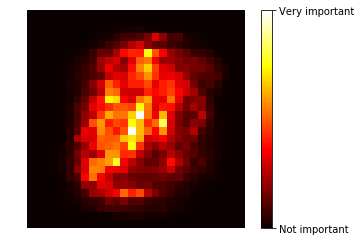

In [60]:
# 可视化特征重要性
def plot_digit(data):
    # 一个像素一个特征 data(784,1) 转化为图片形状(28,28)
    image = data.reshape(28,28)
    plt.imshow(image, cmap=mpl.cm.hot, interpolation="nearest")
    plt.axis("off")

plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(),
                          rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(["Not important","Very important"])
 
plt.show()

## 7.5 提升法

### 7.5.1 AdaBoost

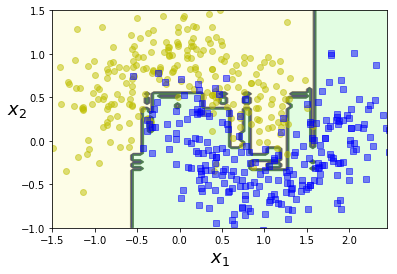

In [100]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost 更适用于 分类任务

# AdaBoostClassifier（AdaBoostClassifier 200颗决策树）
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), # 每棵树是单层决策树
                            n_estimators=200, # 200颗决策树
                            algorithm="SAMME.R", # 多分类的类概率
                            learning_rate=0.5, # 学习率 每次仅提升一般错误分类的实例权重
                            random_state=42)
# 训练
ada_clf.fit(X_train, y_train)
# 绘制训练点集、预测值（填充、绘制预测轮廓）
plot_decision_boundary(ada_clf, X, y)

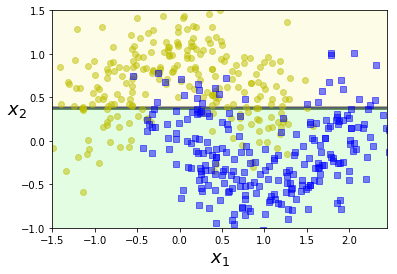

In [104]:
ada_clf1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                            n_estimators=50, # n_estimators↓ 欠拟合数据更多 减小拟合程度
                            algorithm="SAMME.R", 
                            learning_rate=0.01, # learning_rate↓ 学习速度更慢 降低拟合速度
                            random_state=42)

ada_clf1.fit(X_train, y_train)

plot_decision_boundary(ada_clf1, X, y)

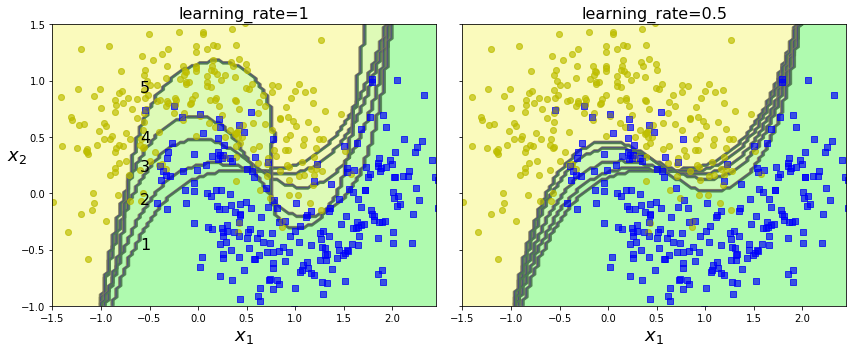

In [128]:
m = len(X_train)
 
fix, axes = plt.subplots(ncols=2, figsize=(12,5),sharey=True)

# learning_rate↓ 训练速度越慢 & learning_rate↓ 学习速度更慢 降低拟合速度
for subplot, learning_rate in ((0,1),(1,0.5)):
    
    # 初始化权重w=1/m
    sample_weight = np.ones(m)
    
    plt.sca(axes[subplot])
    
    # 五个增量SVM模型
    for i in range(5):
        # SVM
        svm_clf = SVC(kernel="rbf", C=0.05, gamma="scale", random_state=42)
        
        # 基于权重进行训练
        svm_clf.fit(X_train, y_train, sample_weight=sample_weight)
        
        # 预测
        y_pred = svm_clf.predict(X_train)
        
        # 提高错误样本的分类权重
        sample_weight[y_pred != y_train] *= (1+learning_rate)
        
        # 绘制训练点集、预测值（填充、绘制预测轮廓）
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate={}".format(learning_rate),fontsize=16)
        
    if subplot ==0:
        plt.text(-0.6, -0.5, "1",fontsize=16)
        plt.text(-0.6, -0.1, "2",fontsize=16)
        plt.text(-0.6, 0.2, "3",fontsize=16)
        plt.text(-0.6, 0.45, "4",fontsize=16)
        plt.text(-0.6, 0.9, "5",fontsize=16)
    else:
        plt.ylabel("")
    
plt.tight_layout()
plt.show()

### 7.5.2 梯度提升

In [129]:
# 训练集
np.random.seed(42)
X = np.random.rand(100,1) - 0.5
# 回归值
y = 3 * X[:,0]**2 + 0.05 * np.random.randn(100)
X.shape, y.shape

((100, 1), (100,))

In [130]:
from sklearn.tree import DecisionTreeRegressor

# 梯度提升 更适用于 回归任务

# 构建 第一个预测器（基于残差 训练下一个预测器）
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
# 训练 第一个预测器
tree_reg1.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [131]:
# 计算残差 y2
y2 = y - tree_reg1.predict(X) 
# 构建 第二个预测器
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
# 训练 第二个预测器
tree_reg2.fit(X, y2) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [132]:
# 计算残差 y3
y3 = y2 - tree_reg2.predict(X) 
# 构建 第三个预测器
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
# 训练 第三个预测器
tree_reg3.fit(X, y3) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [133]:
# 测试集
X_new = np.array([[0.8]])
# 预测 三个预测器预测结果求和（不用求平均值，因为第二棵和第三棵树拟合的是残差）
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

array([1.08692075])

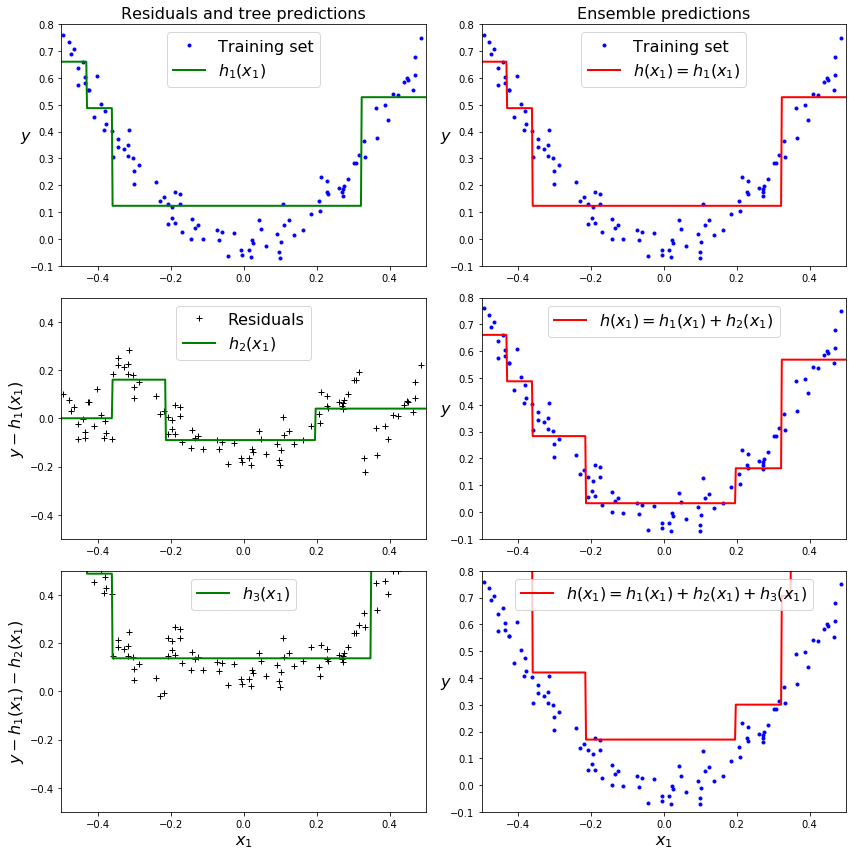

In [134]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-",data_style="b.",data_label=None):
    # 测试集
    x1 = np.linspace(axes[0], axes[1],500)
    # 预测 多个预测器预测结果求和
    y_pred = sum(regressor.predict(x1.reshape(-1,1)) for regressor in regressors)
    # 绘制训练点集
    plt.plot(X[:,0], y, data_style, label=data_label)
    # 绘制测试集轮廓
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(fontsize=16,loc="upper center")
    plt.axis(axes)
    
plt.figure(figsize=(12,12))

# 左一 单个决策树 1
plt.subplot(3,2,1)
# 绘制训练点集、测试集轮廓
plot_predictions([tree_reg1], X, y, axes=[-0.5,0.5,-0.1,0.8],label="$h_1(x_1)$",style="g-",data_label="Training set")
plt.title("Residuals and tree predictions",fontsize=16)
plt.ylabel("$y$",fontsize=16, rotation=0)

# 右一 集成决策树 1
plt.subplot(3,2,2)
# 绘制训练点集、测试集轮廓
plot_predictions([tree_reg1], X, y, axes=[-0.5,0.5,-0.1,0.8],label="$h(x_1)=h_1(x_1)$",data_label="Training set")
plt.title("Ensemble predictions", fontsize=16)
plt.ylabel("$y$",fontsize=16, rotation=0)
 
# 左二 单个决策树 2
plt.subplot(3,2,3)
# 绘制训练点集、测试集轮廓
plot_predictions([tree_reg2],X,y2,axes=[-0.5, 0.5, -0.5, 0.5],label="$h_2(x_1)$",style="g-",data_style="k+",data_label="Residuals")
plt.ylabel("$y-h_1(x_1)$",fontsize=16)

# 右二 集成决策树 1 2
plt.subplot(3,2,4)
# 绘制训练点集、测试集轮廓
plot_predictions([tree_reg1, tree_reg2],X,y,axes=[-0.5, 0.5, -0.1, 0.8],label="$h(x_1)=h_1(x_1)+h_2(x_1)$")
plt.ylabel("$y$",fontsize=16, rotation=0)

# 左三 单个决策树 3
plt.subplot(3,2,5)
# 绘制训练点集、测试集轮廓
plot_predictions([tree_reg3],X,y3,axes=[-0.5, 0.5, -0.5, 0.5],label="$h_3(x_1)$",style="g-",data_style="k+")
plt.ylabel("$y-h_1(x_1)-h_2(x_1)$",fontsize=16)
plt.xlabel("$x_1$",fontsize=16)

# 右三 集成决策树 1 2 3
plt.subplot(3,2,6)
# 绘制训练点集、测试集轮廓
plot_predictions([tree_reg1, tree_reg2, tree_reg3],X,y,axes=[-0.5, 0.5, -0.1, 0.8],label="$h(x_1)=h_1(x_1)+h_2(x_1)+h_3(x_1)$")
plt.xlabel("$x_1$",fontsize=16)
plt.ylabel("$y$",fontsize=16, rotation=0)

plt.tight_layout()
plt.show()

# 集成模型 优于 单独模型（增强多样性 减小过拟合 & 能更好的的泛化数据集）
# n_estimators↓ 欠拟合数据更多 减小拟合程度
# learning_rate↓ 学习速度更慢 降低拟合速度

In [137]:
from sklearn.ensemble import GradientBoostingRegressor

# GradientBoostingRegressor（梯度提升 3颗决策树 学习率更高）
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
# 训练
gbrt.fit(X,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [146]:
# GradientBoostingRegressor（梯度提升 200颗决策树 学习率更低）
gbrt_slow = GradientBoostingRegressor(max_depth=2,n_estimators=200,learning_rate=0.1,random_state=42)
gbrt_slow.fit(X,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

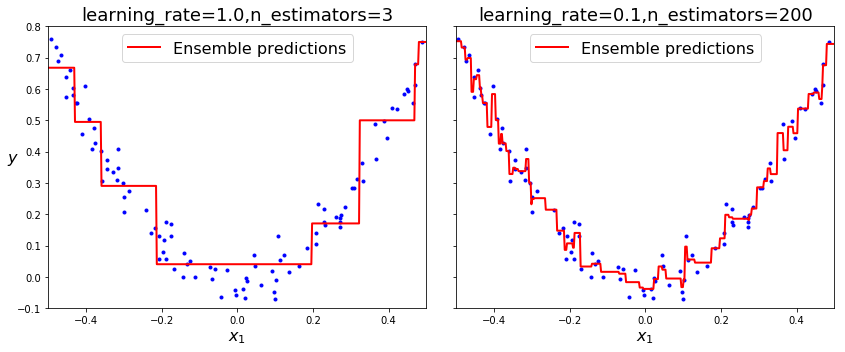

In [147]:
fix, axes = plt.subplots(ncols=2, figsize=(12,5),sharey=True)

# 左图
plt.sca(axes[0])
# 绘制训练点集、测试集轮廓
plot_predictions([gbrt],X,y,axes=[-0.5,0.5,-0.1,0.8],label="Ensemble predictions")
plt.ylabel("$y$",fontsize=16,rotation=0)
plt.xlabel("$x_1$",fontsize=16)
plt.title("learning_rate={},n_estimators={}".format(gbrt.learning_rate,gbrt.n_estimators),fontsize=18)

# 右图
plt.sca(axes[1])
# 绘制训练点集、测试集轮廓
plot_predictions([gbrt_slow],X,y,axes=[-0.5,0.5,-0.1,0.8],label="Ensemble predictions")
plt.xlabel("$x_1$",fontsize=16)
plt.title("learning_rate={},n_estimators={}".format(gbrt_slow.learning_rate,gbrt_slow.n_estimators),fontsize=18)
 
plt.tight_layout()
plt.show()

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 先训练大量的树 再回头找最优的数字

# 划分训练集、测试集
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

# GradientBoostingRegressor(GBRT)（梯度提升 120颗决策树）
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
# 训练
gbrt.fit(X_train, y_train)

# 计算 每个训练阶段返回的迭代器的 验证误差
errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]

# 选择 最小验证误差对应的 最优树数
best_n_estimators = np.argmin(errors)+1

# 根据 最优树数重新训练 GBRT集成
gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=best_n_estimators, random_state=42)

# 重新训练
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=56,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

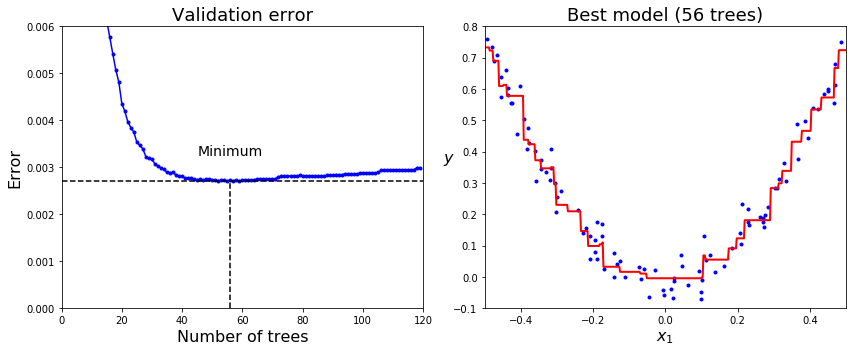

In [150]:
min_error = np.min(errors)
 
plt.figure(figsize=(12,5))

# 左图 验证误差 - 树的数量对应的每个阶段
plt.subplot(121)
plt.plot(errors, "b.-")
# 绘制 最优模型 对应的 最小验证误差 点
plt.plot([best_n_estimators, best_n_estimators],[0,min_error],"k--")
plt.plot(best_n_estimators,min_error,"ro")
plt.text(best_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
# 绘制 树的数量对应每个阶段 产生的 验证误差 曲线
plt.plot([0,120],[min_error,min_error],"k--")
plt.axis([0,120,0,0.006])
plt.xlabel("Number of trees",fontsize=16)
plt.ylabel("Error",fontsize=16)
plt.title("Validation error",fontsize=18)

# 右图 最优模型的拟合效果
plt.subplot(122)
# 绘制训练点集、测试集轮廓
plot_predictions([gbrt_best],X,y,axes=[-0.5,0.5,-0.1,0.8])
plt.title("Best model (%d trees)" % best_n_estimators, fontsize=18)
plt.ylabel("$y$",fontsize=16,rotation=0)
plt.xlabel("$x_1$",fontsize=16)
 
plt.tight_layout()
plt.show()

In [153]:
# 设置 warm_start=True 调用 fit() 方法时 保留现有的树 从而允许增量训练

# GradientBoostingRegressor(GBRT)（梯度提升 增量训练模型-树 warm_start=True）
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

# 初始化最小验证误差 无穷大 随后逐步减小 每次保留更小的验证误差、模型
min_val_error = float("inf")
error_going_up = 0
# 增量训练模型
for n_estimators in range(1,120):
    gbrt.n_estimators = n_estimators
    # 增量训练
    gbrt.fit(X_train, y_train)
    # 预测
    y_pred = gbrt.predict(X_val)
    # 计算验证误差
    val_error = mean_squared_error(y_val, y_pred)
    # 有所改善则 更新验证误差的最小值 继续增量训练
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    # 没有改善则 立刻停止训练 得到最优模型
    else:
        error_going_up += 1
        if error_going_up == 5:
            break

print(gbrt.n_estimators)

61


In [154]:
print("Minimum validation MSE:", min_val_error)

Minimum validation MSE: 0.002712853325235463


In [158]:
import xgboost

# XGBRegressor（XGBoost 可进行梯度提升的优化实现）
xgb_reg = xgboost.XGBRegressor(random_state=42)
# 训练（普通）
xgb_reg.fit(X_train, y_train)
# 预测
y_pred = xgb_reg.predict(X_val)
# 均方根误差
val_error = mean_squared_error(y_val, y_pred)
print("Validataion MSE:",val_error)

# 训练（自动处理提前停止 early_stopping_rounds=2 连续这么多轮迭代中模型的效果没有提升 则立刻停止训练）
xgb_reg.fit(X_train, y_train,eval_set=[(X_val, y_val)],early_stopping_rounds=2)
# 预测
y_pred = xgb_reg.predict(X_val)
# 均方根误差
val_error = mean_squared_error(y_val, y_pred)
print("Validataion MSE:",val_error)

Validataion MSE: 0.004000408205406276
[0]	validation_0-rmse:0.22834
[1]	validation_0-rmse:0.16224
[2]	validation_0-rmse:0.11843
[3]	validation_0-rmse:0.08760
[4]	validation_0-rmse:0.06848
[5]	validation_0-rmse:0.05709
[6]	validation_0-rmse:0.05297
[7]	validation_0-rmse:0.05129
[8]	validation_0-rmse:0.05155
[9]	validation_0-rmse:0.05211
Validataion MSE: 0.002630868681577655


In [161]:
%timeit xgboost.XGBRegressor().fit(X_train, y_train)

71.9 ms ± 3.83 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [162]:
%timeit GradientBoostingRegressor().fit(X_train, y_train)

25 ms ± 2.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
